In [60]:
from pandas import read_csv
titanic = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1-1 공통

### 데이터 기본 정보 확인
- 변수별 결측치의 개수, 데이터 타입을 확인

In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


해석
- 결측치
    - Age, Cabin, Embarked는 결측치가 있는 것으로 보임
    - Cabin은 결측치가 과반수 이상 -> 특성 삭제
    - 결측치는 없지만 수치가 의미 없어보이는 변수 : PassengerId -> 삭제
    - 그외 Age, Embarked -> 결측치를 어떻게 처리할 것인가?
- 변수별 데이터 타입
    - 수치 (양적변수) : int64, float64
    - 텍스트 (질적변수): object
    - 질적변수임에도 양적변수로 표시된 변수 : Survived, Pclass.. -> category 타입으로 변경
    - 그외 질적 변수 -> category 타입으로 변경

In [62]:
# Feature 삭제
del_feat = ['PassengerId', 'Cabin']  # Name도 필요없지 않나?
titanic = titanic.drop(del_feat, axis=1)

In [63]:
# 질적변수의 데이터 타입을 category로 변경
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']
for col in qual:
    titanic[col] = titanic[col].astype('category')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB


### 기술통계
- 데이터프레임 객체에 .describe()를 함으로써 각 데이터 타입 별로 데이터의 기술 통계를 확인할 수 있다.

In [64]:
# 모든 데이터 타입의 변수에 대해 기술 통계 제공
titanic.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.0,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,3
top,0.0,3.0,"Abbing, Mr. Anthony",male,NaN,NaN,NaN,1601,NaN,S
freq,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,644
mean,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [65]:
titanic.describe(include=['float64', 'int64'])

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [66]:
titanic.describe(include=['category'])

,Survived,Pclass,Name,Sex,Ticket,Embarked
count,891,891,891,891,891,889
unique,2,3,891,2,681,3
top,0,3,"Abbing, Mr. Anthony",male,1601,S
freq,549,491,1,577,7,644


# 1-2 질적변수

### 도수분포표, 상대도수분포표
- 도수분포표 : 데이터를 구간별로 나누고, 각 구간에 데이터가 몇 개씩 있는지 정리한 표 -> 값들이 어디에 얼마나 몰려있는지 확인
- 상대도수분포표 : 각 구간의 도수 / 전체 데이터 개수 -> "이 구간이 전체에서 얼마나 차지하는지"를 알려줌
    - 표본 크기가 달라도 비교 가능

In [79]:
# 도수분포표
import pandas as pd

freq = pd.DataFrame(titanic['Survived'].value_counts())
freq

,count
Survived,
0,549
1,342


In [80]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [82]:
# 상대도수분포표 추가
freq['상대도수'] = titanic['Survived'].value_counts(normalize=True)
freq


,count,상대도수
Survived,,
0,549,0.616162
1,342,0.383838


In [84]:
freq = freq.rename(columns={'count': '도수'})
freq

,도수,상대도수
Survived,,
0,549,0.616162
1,342,0.383838


### 상관계수 : 스피어만 순위상관계수, 칸달의 타우
스피어만·켄달 상관계수는
“순서만 의미 있는 변수들끼리, 서로 비슷한 순서로 움직이는지 보는 상관계수"
“등수, 만족도처럼 순서만 있는 변수들 사이의 관계를 재는 방법”

✔ 순위(서열) 기반
✔ 값의 크기 차이는 무시
✔ 이상치에 강함
✔ 정규성 가정 필요 없음

- 비고) 양적변수 -> 피어슨 상관계수


In [85]:
from scipy.stats import spearmanr, kendalltau

In [86]:
corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
print("스피어만 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr, p))

스피어만 상관계수는 -0.340, p-value는 0.000


In [87]:
corr2, p2 = kendalltau(titanic['Survived'], titanic['Pclass'])
print("캔달타우 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr2, p2))

캔달타우 상관계수는 -0.324, p-value는 0.000


**해석**
- 질적변수인 Survived와 Pclass가 음의 상관관계를 가지며
- 이 상관계수가 통계적으로 유의하다 (p-class가 0.05 이하)

**가설**
- 귀무가설 (H0): 두 변수 간 상관이 없다
- 대립가설 (H1): 두 변수 간 상관이 있다

**스피어만의 순위상관계수 가정**
1. 관측치들이 서열과 가능해야 한다
    - 순위를 매길 수 있어야 함
    - Titanic 예제:
        - Survived: 0 < 1 → 가능
        - Pclass: 1 < 2 < 3 → 가능 ⭕
2. 두 변수 간 관계가 단조(monotonic) 여야 함
    - 단조 관계란? : 한 변수가 증가하면 → 다른 변수는 계속 증가하거나 계속 감소하는 경향
    - 직선일 필요 없음. 완만한 곡선 ⭕ 로그 형태 ⭕ 계단식 ⭕
    - 안 되는 경우: U자형 (처음엔 감소 → 다시 증가)

**피어슨 상관계수와의 차이**
- 피어슨과 달리 정규성, 선형관계, 등분산성, 이상치 없음 가정이 필요 없다

Titanic 데이터에 적용하면 왜 적절하냐면
변수 성격 다시 보면
- Survived: 이진 변수 (0/1) → 서열 가능
- Pclass: 1,2,3 → 서열척도
- 관계:
    - Pclass ↑ (3등석으로 갈수록)
    - Survived ↓ (생존률 감소)
👉 명확한 단조 감소 관계
그래서:
- ✔ 스피어만 적절
- ✔ p-value 작음
- ✔ “통계적으로 유의” 해석 가능

### 질적변수 탐색 시각화

In [76]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [77]:
import matplotlib.pyplot as plt

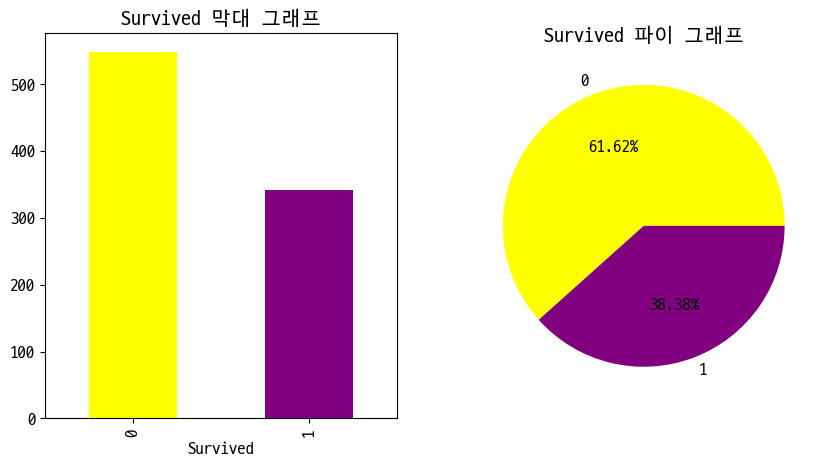

In [88]:
plt.rcParams["figure.figsize"] = (5, 5)  # 그래프 크기
plt.rcParams["font.family"] = 'D2Coding'  # 글꼴
plt.rcParams["font.size"] = 12  # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 표기
fig, ax = plt.subplots(1,2, figsize=(10, 5))  # 그래프 구성

# 막대 그래프
ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax=ax[0], color=['yellow', 'purple'])

# 파이 그래프
ax[1].set_title('Survived 파이 그래프')
ax[1].pie(freq['도수'].values, labels=freq['도수'].index, autopct="%.2f%%", colors=['yellow', 'purple'])
plt.show()


# 1-3 양적변수

### 도수분포표, 상대도수분포표
- 양적변수의 도수분포표를 그리기 위해서는 먼저 계급을 설정해주어야 한다. 
- 계급의 개수 : 5 ~ 20개 사이
- 계급의 크기 : (자료의 최댓값 - 최솟값)/(계급의 수)


In [90]:
import pandas as pd

# 계급의 개수를 지정하여 도수분포표 생성
result1 = pd.cut(titanic['Age'], bins=5)
freq1 = pd.DataFrame(result1.value_counts()).reset_index()
freq1


,Age,count
0,"(16.336, 32.252]",346
1,"(32.252, 48.168]",188
2,"(0.34, 16.336]",100
3,"(48.168, 64.084]",69
4,"(64.084, 80.0]",11


In [91]:
freq1 = freq1.rename(columns={'Age': '계급', 'count': '도수'}).sort_values(by='계급')
freq1

,계급,도수
2,"(0.34, 16.336]",100
0,"(16.336, 32.252]",346
1,"(32.252, 48.168]",188
3,"(48.168, 64.084]",69
4,"(64.084, 80.0]",11


In [92]:
# 상대도수분포표 추가
freq1['상대도수'] = freq1['도수'].apply(lambda x: x/freq1['도수'].sum())
freq1

,계급,도수,상대도수
2,"(0.34, 16.336]",100,0.140056
0,"(16.336, 32.252]",346,0.484594
1,"(32.252, 48.168]",188,0.263305
3,"(48.168, 64.084]",69,0.096639
4,"(64.084, 80.0]",11,0.015406


In [93]:
# 계급의 범위를 지정하여 도수분포표 생성
result2 = pd.cut(titanic['Age'], bins=[0, 20, 40, 60, float('inf')], right=False)  # right : 왼쪽값 이상 오른쪽값 미만
freq2 = pd.DataFrame(result2.value_counts()).reset_index()

freq2 = freq2.rename(columns={'Age': '계급', 'count': '도수'}).sort_values(by='계급')
freq2

,계급,도수
1,"[0.0, 20.0)",164
0,"[20.0, 40.0)",387
2,"[40.0, 60.0)",137
3,"[60.0, inf)",26


In [94]:
# 상대도수 추가
freq2['상대도수'] = freq2['도수'].apply(lambda x: x/freq2['도수'].sum())
freq2

,계급,도수,상대도수
1,"[0.0, 20.0)",164,0.229692
0,"[20.0, 40.0)",387,0.542017
2,"[40.0, 60.0)",137,0.191877
3,"[60.0, inf)",26,0.036415


### 계산적 대푯값
- 산술평균 : 주어진 수의 합을 수의 개수로 나눈 값
- 기하평균 : (x1​×x2​×⋯×xn​)^(1/n) -> 값들을 전부 곱한 뒤, 개수만큼 제곱근을 취한 평균 -> 경제성장률, 물가변동률 등 시간적으로 변화하는 비율의 대푯값
- 조화평균 : 평균 작업 속도, 평균 속도 등 시간적으로 계속 변화하는 속도의 대푯값
- 절사평균 : 자료의 총 개수에서 일정 비율만큼 가장 큰 부분과 작은 부분을 제거한 후 산출한 산술 평균
- 평방평균 : 비정상적 관측치의 영향을 부각시킬 때 사용

In [53]:
from scipy.stats.mstats import gmean, hmean, tmean
import numpy as np

example = [1, 2, 3, 4, 5, 10]
print("산술평균: {:.2f}".format(np.mean(example)))
print("기하평균: {:.2f}".format(gmean(example)))
print("조화평균: {:.2f}".format(hmean(example)))

# 1이상 5이하의 범위를 벗어나는 값을 제외
print("절사평균: {:.2f}".format(tmean(example, (1,5))))

# 평방평균
qm = np.sqrt(np.mean(np.array(example)**2))  # list를 array로 변경한 후 계산
print("평방평균: {:.2f}".format(qm))


산술평균: 4.17
기하평균: 3.26
조화평균: 2.52
절사평균: 3.00
평방평균: 5.08


### 위치적 대푯값
- 중위수(Median), 최빈값(Modes), 사분위수(Quartile), 분위수(Quantile), 백분위수(Percentile)가 있다.


In [ ]:
import numpy as np

print("중위수 : ", titanic['Fare'].median())
print("최빈값 : ", titanic['Fare'].mode()[0])
print("1사분위수 : ", titanic['Fare'].quantile(q=0.25))
print("2사분위수 : ", titanic['Fare'].quantile(q=0.5))
print("3사분위수 : ", titanic['Fare'].quantile(q=0.75))
print("50백분위수 : ", np.percentile(titanic['Fare'], 50))
print("75백분위수 : ", np.percentile(titanic['Fare'], 75))


중위수 :  14.4542
최빈값 :  8.05
1사분위수 :  7.9104
2사분위수 :  14.4542
3사분위수 :  31.0
50백분위수 :  14.4542
75백분위수 :  31.0


### 절대적 산포도
- 범위: 관측값의 최댓값에서 최솟값을 뺀 값
- 사분위범위: 3사분위수에서 1사분위수를 뺸 값
- 평균편차: 편차의 절닷값의 산술평균
- 사분편차: 사분위범위/2
- 분산: 편차의 제곱의 산술평균
- 표준편차: 분산의 양의 제곱근 

### 상관계수 : 피어슨의 적률상관계수
- 피어슨의 적률상과계수는 양적변수의 상관관계를 나타낸다.

In [95]:
from scipy.stats import pearsonr
titanic = titanic.dropna(axis=0)
corr, p = pearsonr(titanic['Age'], titanic['Fare'])
print("피어슨 상관계수 : {:.3f}, p-value : {:.3f}".format(corr, p))

피어슨 상관계수 : 0.093, p-value : 0.013


##### 해석
- 피어슨 상관계수가 0.093 : 상관관계가 거의 없다 (매우 약함. 한 변수가 다른 변수를 1%도 설명 못함)
- p-value 0.013 : 0.05보다 작으므로 H0 기각 -> 두 변수의 모상관계수 p는 0이 아니다 -> 선형 상관관계가 있다. 
    - 실제로 상관관계가 전혀 없는데(p=0), 우연히 r=0.093 같은 값이 나올 확률이 1.3%다.
- 피어슨 상관분석 결과, 두 변수 간 상관관계는 통계적으로 유의하였으나, 효과 크기는 매우 작아 실질적인 선형 관계는 미약한 수준이다.

### 양적변수 탐색 시각화
- 줄기잎그림, 히스토그램, 오자이브, 상자그림, 산점도 등이 있다.

In [97]:
!pip install stemgraphic

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 652.7 kB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13783 sha256=2091af963acd8b639a37b80a6617738f02d1f7313fea3aef34438cf09baa1152
  Stored in directory: /Users/sujin/Library/Caches/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


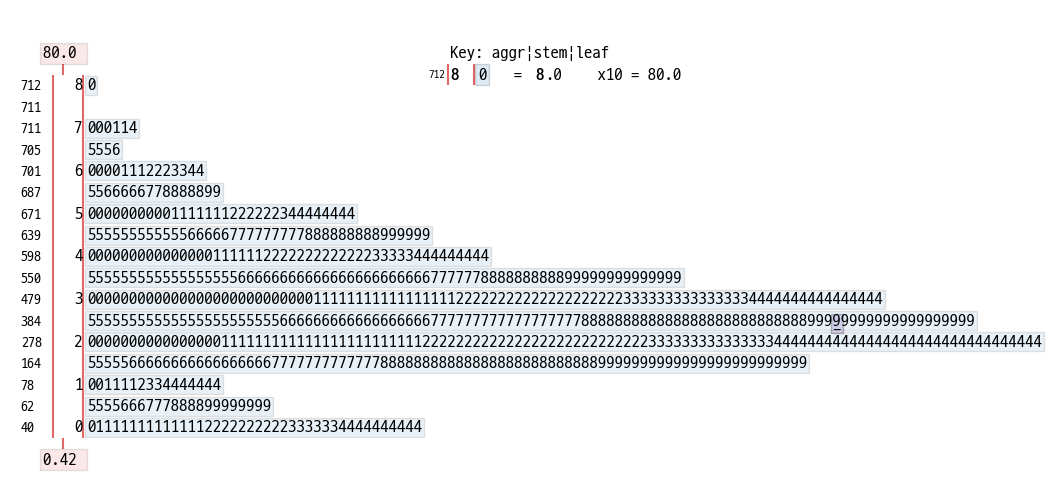

In [98]:
# 줄기잎그림 : 데이터 세로선을 기준으로 줄기와 잎 두 부분으로 나누어 구분함으로써 데이터의 대략적 분포를 확인할 수 있게한다.
# 자료의 개수가 많이 않을 경우에 사용하며, 자료가 많을 경우에는 히스토그램을 사용한다.

import stemgraphic
stemgraphic.stem_graphic(titanic['Age'])
plt.show() 

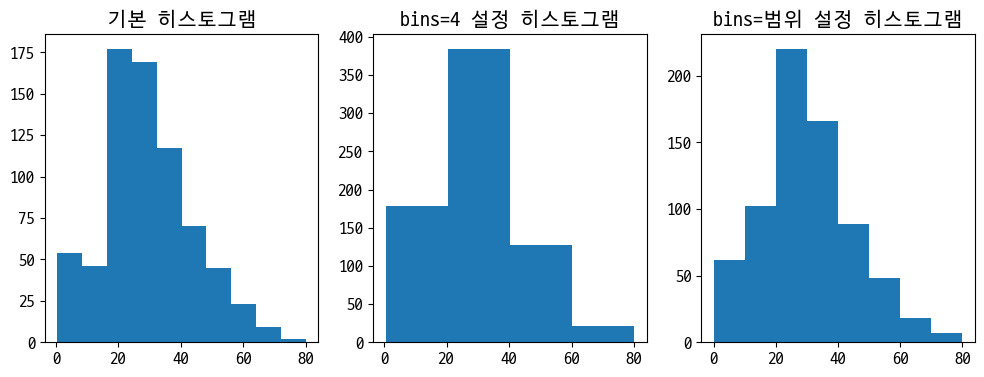

In [101]:
# 히스토그램 : 도수분포의 상태를 도수분포표의 계급과 도수를 이용하여 기둥 모양으로 나타낸 그래프
# x축에는 연속형 변수의 계급을 표시하고, y축에는 빈도를 표시한다.
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].hist(titanic['Age'])
ax[0].set_title("기본 히스토그램")
ax[1].hist(titanic['Age'], bins=4)
ax[1].set_title("bins=4 설정 히스토그램")
ax[2].hist(titanic['Age'], bins=[i for i in range(0, 90, 10)])
ax[2].set_title("bins=범위 설정 히스토그램")
plt.show()



[도수분포표]
          계급   도수  누적도수   계급값
4   (0, 10]   64    64   5.0
2  (10, 20]  115   179  15.0
0  (20, 30]  230   409  25.0
1  (30, 40]  154   563  35.0
3  (40, 50]   86   649  45.0
5  (50, 60]   42   691  55.0
6  (60, 70]   16   707  65.0
7  (70, 80]    5   712  75.0 



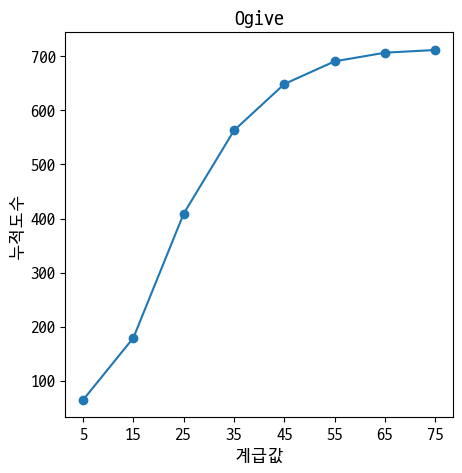

In [110]:
# 오자이브는 누적도수다각형의 각 계급구간의 누적도수에 대응하는 기둥의 맨 위 중간점들을 직선으로 연결했을 때 나타나는 그래프이다.
# 오자이브 그리기
from pandas import cut
# 도수분포표 생성
result1 = cut(titanic['Age'], bins=[i for i in range(0, 90, 10)])
freq1 = pd.DataFrame(result1.value_counts()).reset_index().rename(columns={'Age':'계급', 'count': '도수'}).sort_values(by='계급')
freq1['누적도수'] = freq1['도수'].cumsum()
freq1['계급값'] = freq1['계급'].apply(lambda x: np.median([x.left, x.right]))
print("[도수분포표]\n", freq1, "\n")

plt.plot(freq1['계급값'], freq1['누적도수'], marker='o')
plt.xticks(freq1['계급값'])
plt.ylabel('누적도수')
plt.xlabel('계급값')
plt.title('Ogive')
plt.show()

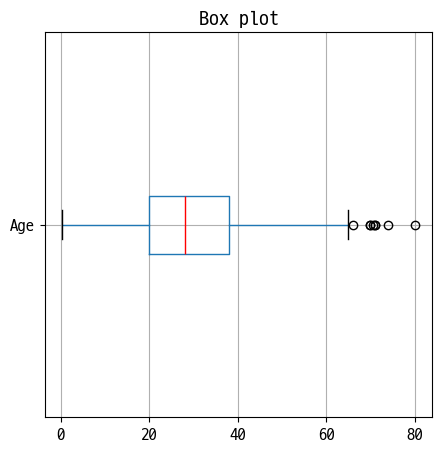

In [114]:
# 상자그림 : 5가지 요약 수치인 최솟값, 최댓값, 1,2,3사분위수를 통해 데이터의 산포도를 구체적으로 시각화한다.
# 가운데 박스의 왼쪽변 : 1사분위 수
# 가운데 선 : 2사분위수 (중위수)
# 오른쪽 변이 3사분위수
# 박스를 벗어난 양 옆의 수염이 각각 최솟값과 최댓값을 나타냄
from matplotlib import pyplot as plt
# vert=False는 수평, True는 수직 상자 그림, medianprops의 color는 중위수 색상
titanic[['Age']].boxplot(vert=False, medianprops={'color': 'red'})
plt.title('Box plot')
plt.yticks(ticks=[1], labels=['Age'])  # y=1 위치에 있는 눈금의 이름을 "Age"로 바꿔라
plt.show()

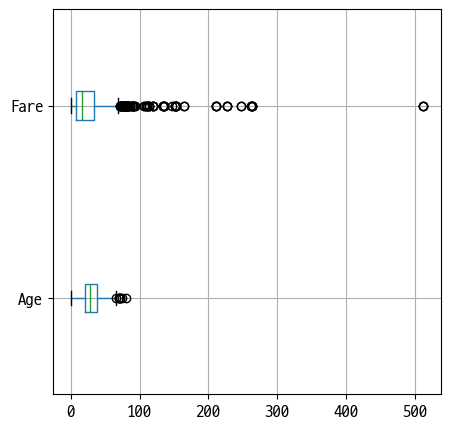

In [116]:
titanic[['Age', 'Fare']].boxplot(vert=False)
# plt.yticks([1, 2], ['Age', 'Fare'])
plt.show()

### 산점도
- 두 변수의 2차원 데이터를 좌표평면 위에 점으로 나타낸 그래프

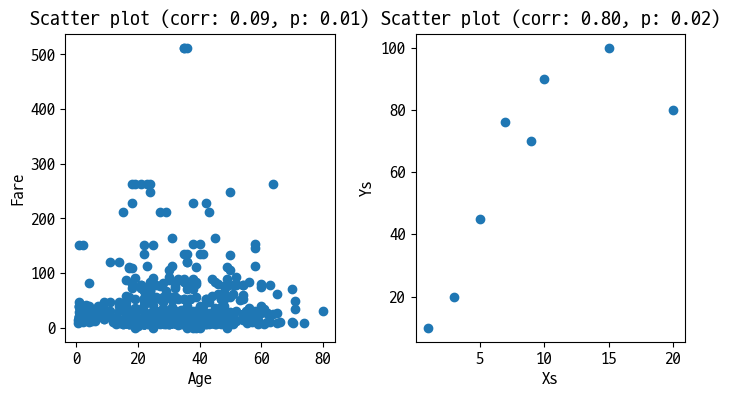

In [118]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

ax[0].scatter(titanic['Age'], titanic['Fare'])
# ax[0].set_title('Scatter plot (corr: %.2f, p: %.2f)')
ax[0].set_title('Scatter plot (corr: %.2f, p: %.2f)' %
                (pearsonr(titanic['Age'], titanic['Fare'])))
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')

Xs = [1, 3, 5, 7, 9, 15, 20, 10]
Ys = [10, 20, 45, 76, 70, 100, 80, 90]
ax[1].scatter(Xs, Ys)
ax[1].set_title('Scatter plot (corr: %.2f, p: %.2f)' %(pearsonr(Xs, Ys)))
ax[1].set_xlabel('Xs')
ax[1].set_ylabel('Ys')
plt.show()
